#### Here we load the biometric data into a series of pandas dataframes and then combine them to create one file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import sys
%matplotlib inline

#### Load the datasets

First we'll load the 'protocol' data from the 9 subjects, then the 'optional' data

In [2]:
column_names = ['timestamp','activityID','heartrate','T_hand','A1C1_hand','A1C2_hand','A1C3_hand','A2C1_hand','A2C2_hand','A2C3_hand',
               'G1C1_hand','G1C2_hand','G1C3hand','M1C1_hand','M1C2_hand','M1C3_hand','O1_hand','O2_hand','O3_hand','O4_hand','T_chest','A1C1_chest',
                'A1C2_chest','A1C3_chest','A2C1_chest','A2C2_chest','A2C3_chest','G1C1_chest','G1C2_chest','G1C3_chest','M1C1_chest','M1C2_chest',
                'M1C3_chest','O1_chest','O2_chest','O3_chest','O4_chest','T_ankle','A1C1_ankle','A1C2_ankle','A1C3_ankle','A2C1_ankle','A2C2_ankle','A2C3_ankle',
               'G1C1_ankle','G1C2_ankle','G1C3_ankle','M1C1_ankle','M1C2_ankle','M1C3_ankle','O1_ankle','O2_ankle','O3_ankle','O4_ankle']

In [3]:
len(column_names)

54

In [4]:
protocol_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol"
optional_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Optional"
subject_data = glob.glob("%s/*.dat" %protocol_datadir)

### Concatinate the data from all subjects into a labelled dataframe

In [5]:
dfs = []

for i in range(len(subject_data)):
    
    print("Dealing with subject %i" %i)
    
    df = pd.read_csv(subject_data[i],sep=' ',names=column_names)
    df['subject'] = (i+1)*np.ones(len(df))
    dfs.append(df)
    
protocol_activities = pd.concat(dfs)

Dealing with subject 0
Dealing with subject 1
Dealing with subject 2
Dealing with subject 3
Dealing with subject 4
Dealing with subject 5
Dealing with subject 6
Dealing with subject 7
Dealing with subject 8


In [6]:
protocol_activities['subject'].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

### Generate a picture of the null values in this dataframe (takes a long time to run)

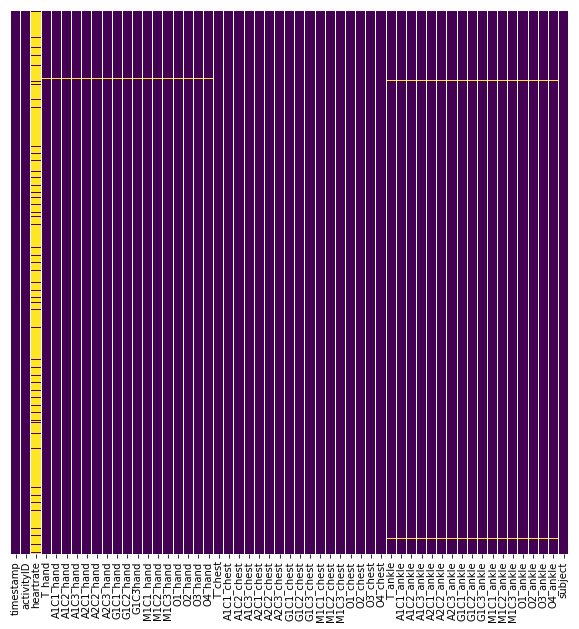

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(protocol_activities.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are many NaNs in the heartrate column.  

This is because of the difference in sampling rate - we can interpolate the heart rate data or perhaps train 
a random forest to fill the gaps here 

### Creates a large file (1.5Gb)

In [23]:
protocol_activities.to_csv("All_subjects_activities.csv",index=False)